# Working with Time Series Data in Pandas

#### Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20

import warnings
warnings.filterwarnings('ignore')

# 🌤️ SF Weather Data

#### For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

In [2]:
from vega_datasets import data
df = data.sf_temps()

In [4]:
df = df.set_index('date').sort_index()

In [5]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


Text(0.5, 1.0, 'Average Temperature Over Time(Day)')

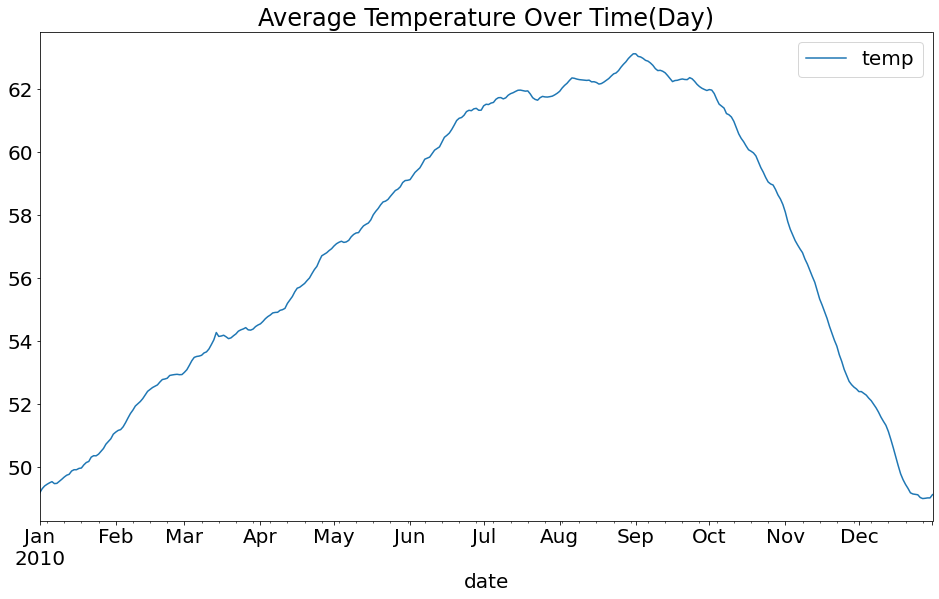

In [11]:
# Resample by day
daily_avg = df.resample('D').mean()
daily_avg.plot()
plt.title('Average Temperature Over Time(Day)')

## 2. Write the code necessary to visualize the minimum temperature over time.

Text(0.5, 1.0, 'Minimum Temperature Over Time(Day)')

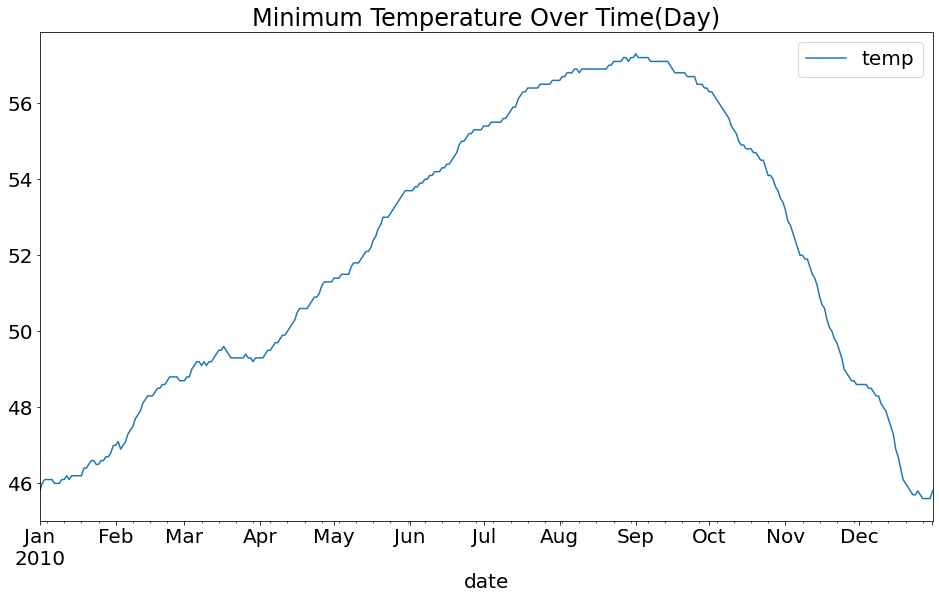

In [12]:
# Resample by day, aggregate by min
daily_min = df.resample('D').min()
daily_min.plot()
plt.title('Minimum Temperature Over Time(Day)')

## 3. Write the code necessary to visualize the maximum temperature over time.

Text(0.5, 1.0, 'Maximum Temperature Over Time(Day)')

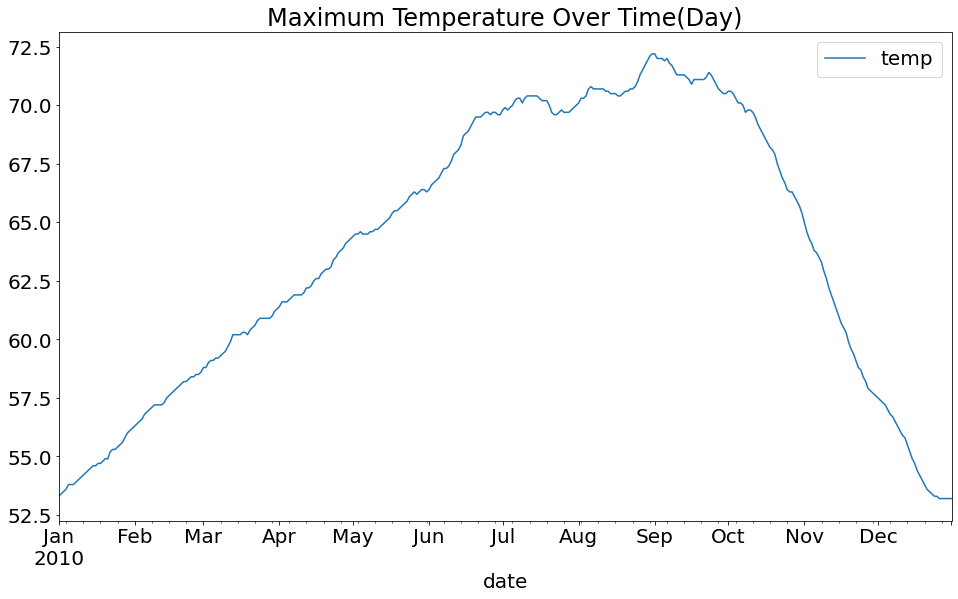

In [14]:
# Resample by day, aggregate by max
daily_max = df.resample('D').max()
daily_max.plot()
plt.title('Maximum Temperature Over Time(Day)')

## 4. Which month is the coldest, on average?

Text(0.5, 1.0, 'AverageTemperature Over Time(Month)')

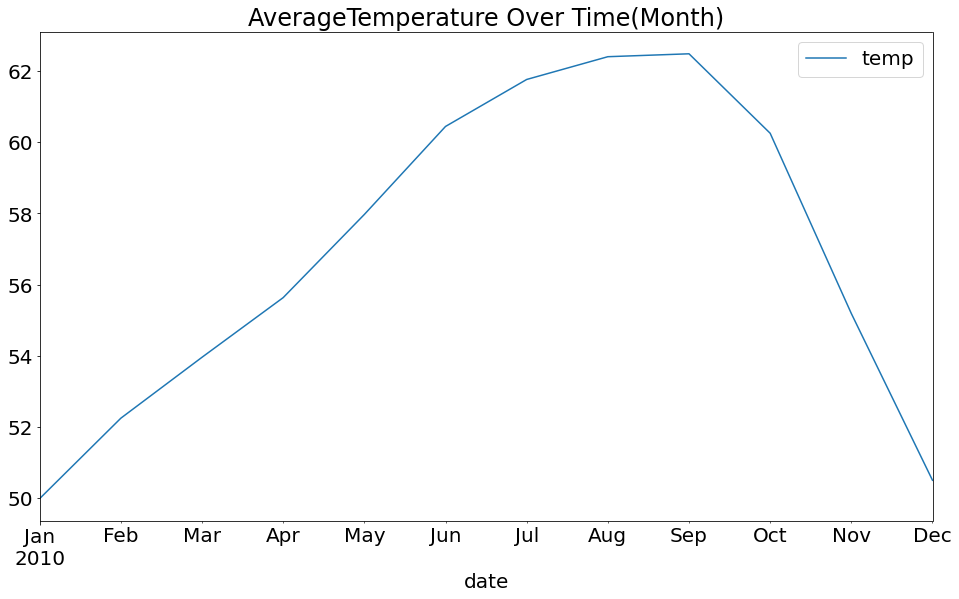

In [28]:
# Resample by month
monthly_avg = df.resample('M').mean()
monthly_avg.plot()
plt.title('AverageTemperature Over Time(Month)')

In [29]:
# .strftime converts datetime to string
monthly_avg.idxmin()[0].strftime('%B')

'January'

In [30]:
monthly_avg.temp.idxmin().month_name()

'January'

### <span style="color: green">January is the coldest on average.</span>

## 5. Which month has the highest average temperature?

In [31]:
monthly_avg.idxmax()[0].strftime('%B')

'September'

In [32]:
monthly_avg.temp.idxmax().month_name()

'September'

### <span style="color: green">September has the highest average temperature.</span>

## 6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max']))`. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [36]:
df['daily_change'] = df.resample('D').max()-df.resample('D').min()

In [48]:
df['month'] = df.index.month

In [51]:
df.groupby('month').daily_change.max().sort_values(ascending=False)

month
8     15.0
9     14.9
6     14.8
7     14.8
10    14.4
5     13.1
4     13.0
3     12.0
11    11.8
2      9.9
1      9.3
12     8.9
Name: daily_change, dtype: float64

### <span style="color: green">August has the highest variability.</span>

## 7. BONUS: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

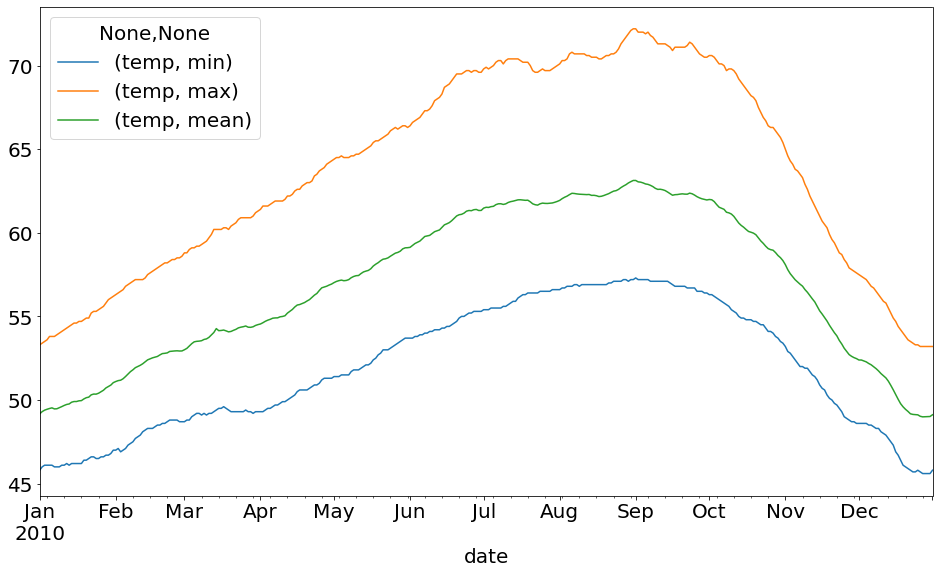

In [53]:
daily_aggs = df.resample('D').agg({'temp': ['min', 'max', 'mean']})
daily_aggs.plot()

***

# ⛈️ Seattle Weather Data

#### Use the dataset to answer the following questions:

In [54]:
from vega_datasets import data
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


## 1. Which year and month combination has the highest amount of precipitation?

In [73]:
# Storing seattle weaather to dataframe
df = data.seattle_weather()

In [74]:
df = df.set_index('date')

In [76]:
# Getting year from dates
df['year'] = df.index.year

In [78]:
# Getting month from dates
df['month'] = df.index.strftime('%b')

In [79]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,Jan
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,Jan
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,Jan
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,Jan
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,Jan


In [85]:
monthly_precip = df.resample('M').precipitation.sum()
monthly_precip.idxmax().strftime("%B %Y")

'December 2015'

## 2. Visualize the amount of monthly precipitation over time.

Text(0.5, 1.0, 'Monthly Precipitation Over Time')

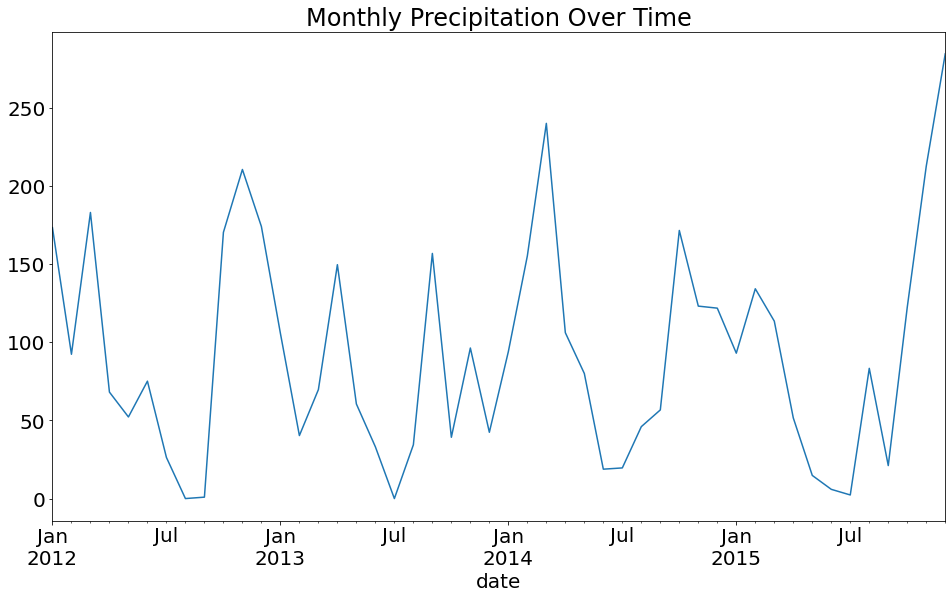

In [89]:
monthly_precip = df.resample('M').precipitation.sum()
monthly_precip.plot()
plt.title('Monthly Precipitation Over Time')

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Text(0.5, 1.0, 'Wind Over Time(Day)')

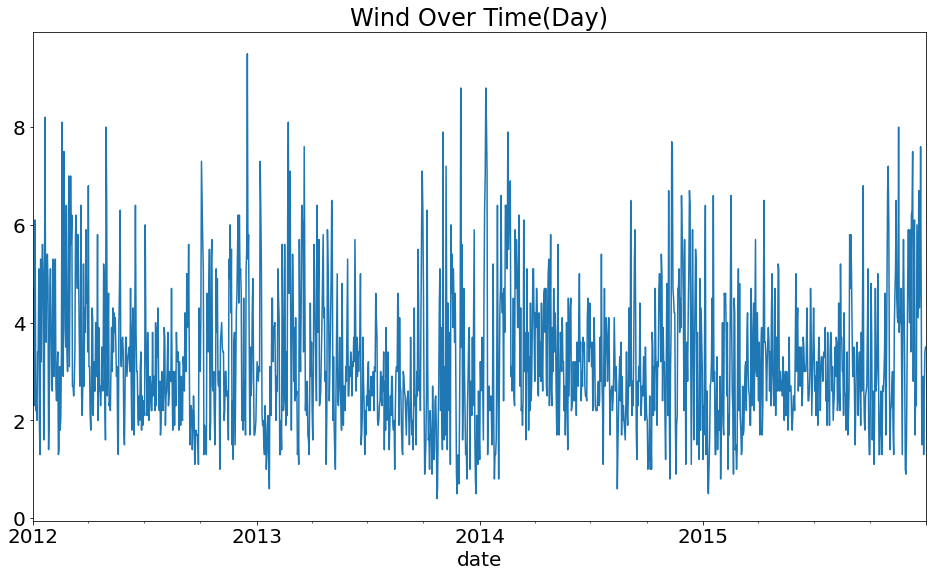

In [92]:
daily_wind = df.resample('d').wind.mean()
daily_wind.plot()
plt.title('Wind Over Time(Day)')

Text(0.5, 1.0, 'Wind Over Time(Bi-weekly)')

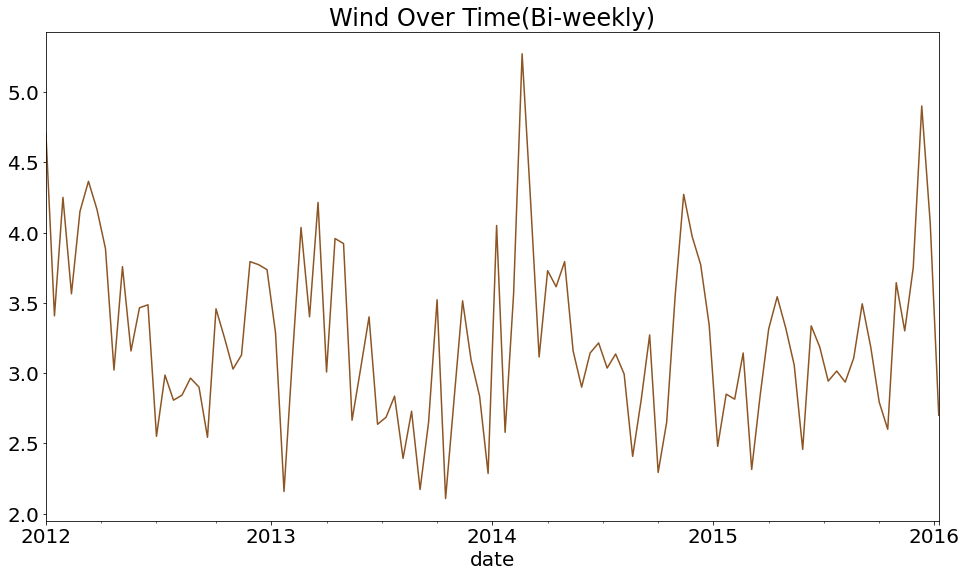

In [94]:
df.resample('2w').wind.mean().plot(color = '#8d5524')
plt.title('Wind Over Time(Bi-weekly)')

## 4. Which year-month combination is the windiest?

In [95]:
monthly_wind = df.resample('M').wind.sum()
monthly_wind.idxmax().strftime("%B %Y")

'December 2015'

## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [102]:
# Filter out sunny days
df['sunny'] = (df['weather']=='sun')
sunny_year = df.resample('Y').sunny.sum()

In [103]:
sunny_year.idxmax().strftime('%Y')

'2014'

## 6. In which month does it rain the most?

In [104]:
# Filter out rainy days
df['rainy'] = (df['weather']=='rain')
rainy_month = df.resample('m').rainy.sum()
rainy_month.idxmax().strftime('%B %Y')

'November 2012'

#### Which month does it rain the least?

In [107]:
rainy_month.idxmin().strftime('%B %Y')

'April 2013'

## 7. Which month has the most number of days with a non-zero amount of precipitation?

In [105]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,sunny,rainy
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,Jan,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,Jan,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,Jan,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,Jan,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,Jan,False,True


In [106]:
#Filter out days with != 0 precipitation
df['has_prec'] = (df['precipitation']!=0)
hasprec_month = df.resample('m').has_prec.sum()
hasprec_month.idxmax().strftime('%B %Y')

'December 2012'

***

# 🛫 Flights

In [108]:
data.flights_20k()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [109]:
df = data.flights_20k()

In [115]:
df = df.set_index('date')

## 1. Convert any negative delays to 0.

In [110]:
df.delay = df.delay.apply(lambda x: x if x > 0 else 0)

In [113]:
df.delay.head(10)

0    32
1     0
2     3
3     0
4     0
5     3
6    20
7     0
8    22
9     0
Name: delay, dtype: int64

## 2. Which hour of the day has the highest average delay?

<AxesSubplot:xlabel='date'>

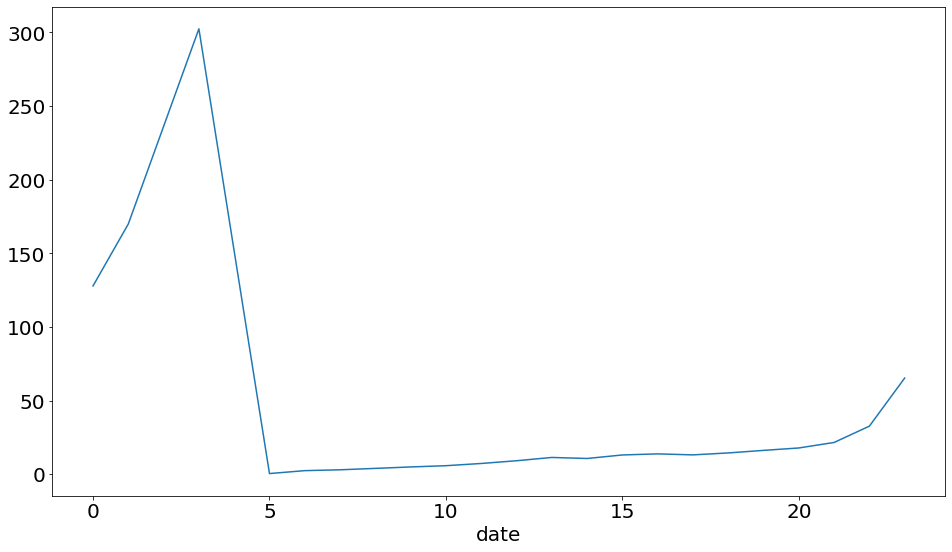

In [116]:
df.groupby(df.index.hour).delay.mean().plot()

In [122]:
df['hour'] = df.index.hour
df.groupby('hour').delay.mean().sort_values(ascending = False).head()

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
Name: delay, dtype: float64

## 3. Does the day of the week make a difference in the delay amount?

In [124]:
df['day'] = df.index.day_name()
df.groupby('day').delay.mean().sort_values(ascending = False)

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

Text(0.5, 1.0, 'Delay Amount per Day of Each Week')

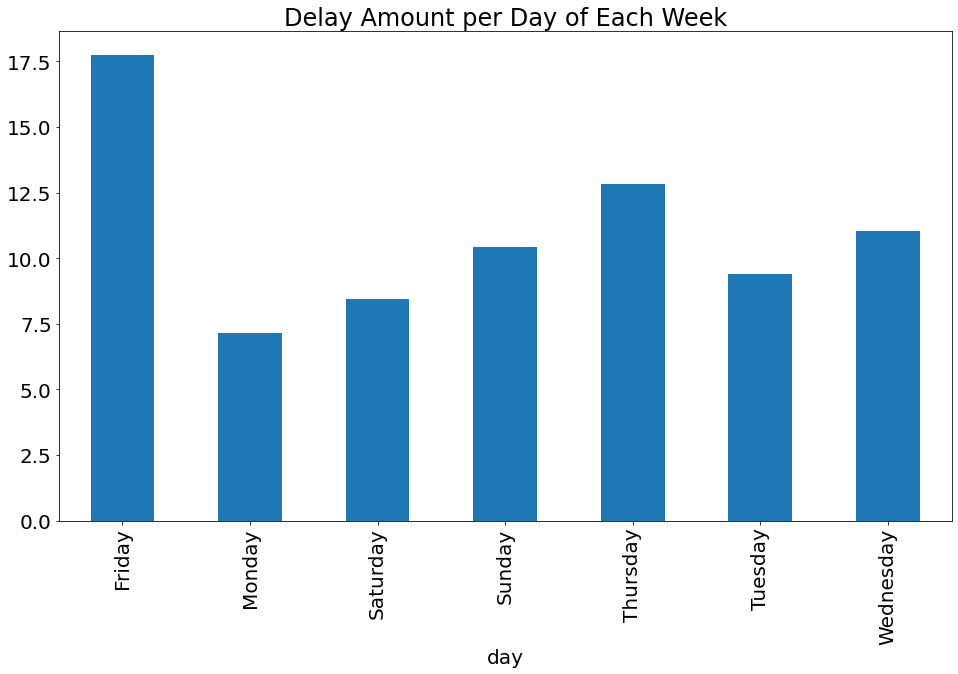

In [126]:
df.groupby('day').delay.mean().plot(kind='bar')
plt.title('Delay Amount per Day of Each Week')

## 4. Does the month make a difference in the delay amount?


In [127]:
df['month'] = df.index.month
df.groupby('month').delay.mean().sort_values()

month
3     9.875287
1    11.301592
2    12.306106
Name: delay, dtype: float64

Text(0.5, 1.0, 'Delay Amount per Month')

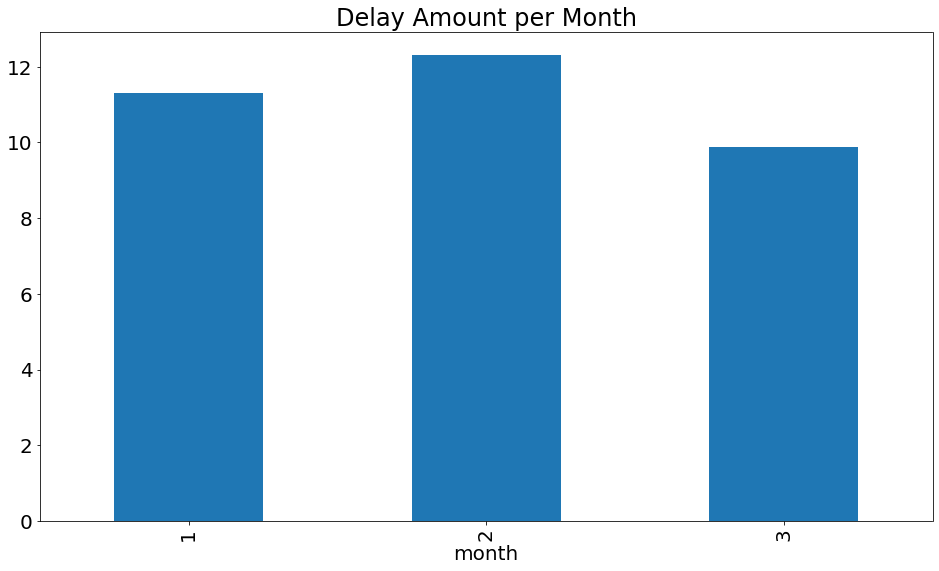

In [128]:
df.groupby('month').delay.mean().plot(kind='bar')
plt.title('Delay Amount per Month')